In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('/Users/padminiyadav/movie_rec_project/movies_metadata.csv')

In [5]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
df.head(2).T

,0,1
adult,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN
budget,30000000,65000000
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
homepage,http://toystory.disney.com/toy-story,NaN
id,862,8844
imdb_id,tt0114709,tt0113497
original_language,en,en
original_title,Toy Story,Jumanji
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...


In [7]:
df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [8]:
df.shape

(45466, 24)

In [9]:
(df.isnull().sum()/df.shape[0])*100

adult                     0.000000
belongs_to_collection    90.115691
budget                    0.000000
genres                    0.000000
homepage                 82.883913
id                        0.000000
imdb_id                   0.037391
original_language         0.024194
original_title            0.000000
overview                  2.098271
popularity                0.010997
poster_path               0.848986
production_companies      0.006598
production_countries      0.006598
release_date              0.191352
revenue                   0.013197
runtime                   0.578454
spoken_languages          0.013197
status                    0.191352
tagline                  55.104914
title                     0.013197
video                     0.013197
vote_average              0.013197
vote_count                0.013197
dtype: float64

In [10]:
print('1.EXPLORING "BELONGS TO COLLECTION"\n','\nTYPE: ',\
      type(df[df['belongs_to_collection'] != 'NaN']['belongs_to_collection'][0]), \
      '\nSAMPLE ENTRY:' , \
      df[df['belongs_to_collection'] != 'NaN']['belongs_to_collection'][0])

1.EXPLORING "BELONGS TO COLLECTION"
 
TYPE:  <class 'str'> 
SAMPLE ENTRY: {'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}


In [11]:
df.drop(columns=['belongs_to_collection'], axis=1, inplace=True)

In [12]:
print('2.EXPLORING "HOMEPAGE"\n','\nTYPE: ',\
      type(df[df['homepage'] != 'NaN']['homepage'][0]), \
      '\nSAMPLE ENTRY:' , \
      df[df['homepage'] != 'NaN']['homepage'][0])

2.EXPLORING "HOMEPAGE"
 
TYPE:  <class 'str'> 
SAMPLE ENTRY: http://toystory.disney.com/toy-story


In [13]:
df.drop(columns=['homepage'], axis=1, inplace=True)
df.drop(columns=['poster_path'], axis=1, inplace=True)

In [14]:
df.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

## 1. Original language

In [15]:
df['original_language'].value_counts()

en       32269
fr        2438
it        1529
ja        1350
de        1080
         ...  
lb           1
82.0         1
68.0         1
104.0        1
cy           1
Name: original_language, Length: 92, dtype: int64

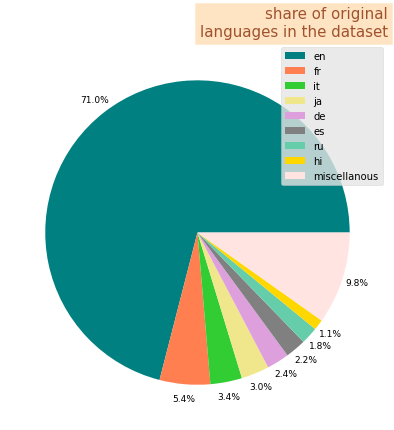

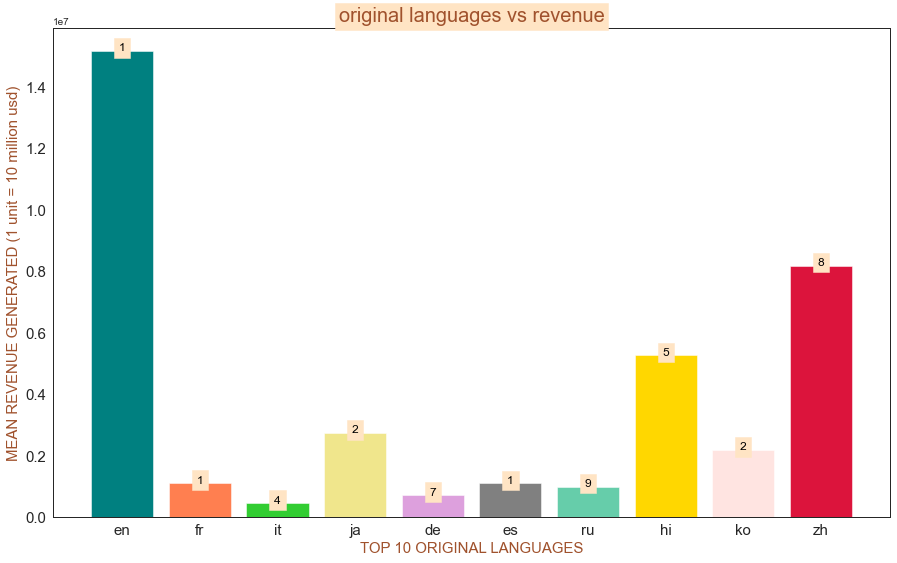

In [16]:
plt.style.use('ggplot')
colors = ['teal', 'coral', 'limegreen',
         'khaki', 'plum', 'grey', 'mediumaquamarine', 'gold', 'mistyrose']
plt.figure(figsize=(10,7))
labels= list(df['original_language'].value_counts().index[:8])
labels.append('miscellanous')
x_os = list(df['original_language'].value_counts().values[:8])
x_os.append(int(df['original_language'].value_counts().values[8:].sum()))
plt.pie(x_os, autopct="%1.1f%%", pctdistance=1.1,textprops = { "fontsize" : 9 }, colors=colors)
plt.title('share of original\nlanguages in the dataset', \
          size=14,color='sienna',backgroundcolor='bisque', loc='right', fontsize=15)
plt.legend(labels, loc='upper right',fontsize = 'medium')

plt.show()

c=0
sns.set_style('white')
colors = ['teal', 'coral', 'limegreen',
         'khaki', 'plum', 'grey', 'mediumaquamarine', 'gold', 'mistyrose', 'crimson']
plt.figure(figsize=(15,9))
for i in df['original_language'].value_counts().index[:10]:
    x = i
    y = df[df['original_language']== f'{i}']['revenue'].mean()
    plt.bar(x,y, color= colors[c])
    plt.text(x, y, str(y)[:1], color='black', backgroundcolor='bisque',\
             size=12, ha='center', va='baseline')
    plt.xticks(size=15)
    plt.xlabel('TOP 10 ORIGINAL LANGUAGES', size=15, color='sienna')
    plt.yticks(size=15)
    plt.ylabel('MEAN REVENUE GENERATED (1 unit = 10 million usd)', size=15, color='sienna')
    plt.title('original languages vs revenue',size=20,color='sienna',backgroundcolor='bisque', loc='center', fontsize=20)
    c+=1

plt.show()

## 3. Genres

In [17]:
data_gens=[]
for i in df.genres:
    id_gens=[]
    text_to_search = str(i)
    pattern = re.compile(r"'name': '\w+'")
    matches = pattern.finditer(text_to_search)
    for match in matches:
        k = match.span()[0]+9
        j = match.span()[1]-1
        id_gens.append(text_to_search[k:j])
    data_gens.append(id_gens)

In [18]:
len(data_gens)

45466

In [19]:
gens=[]
for i in df.genres:
    text_to_search = str(i)
    pattern = re.compile(r"'name': '\w+'")
    matches = pattern.finditer(text_to_search)
    for match in matches:
        i= match.span()[0]+9
        j=match.span()[1]-1
        if text_to_search[i:j] not in gens:
            gens.append(text_to_search[i:j])

In [20]:
gens

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'History',
 'Mystery',
 'War',
 'Foreign',
 'Music',
 'Documentary',
 'Western',
 'Aniplex',
 'GoHands']

In [21]:
data = df[['genres']]

In [22]:
for i in gens:
    data[f'{i}'] = 0

In [23]:
data

,genres,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,...,Horror,History,Mystery,War,Foreign,Music,Documentary,Western,Aniplex,GoHands
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[{'id': 35, 'name': 'Comedy'}]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45462,"[{'id': 18, 'name': 'Drama'}]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45464,[],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
for i in range(len(data_gens)):
    data['genres'][i]= data_gens[i]

In [25]:
for i in list(data.index):
    for j in data.genres[i]:
        data[f'{j}'][i] =1

In [26]:
data.head(2)

,genres,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,...,Horror,History,Mystery,War,Foreign,Music,Documentary,Western,Aniplex,GoHands
0,"[Animation, Comedy, Family]",1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Adventure, Fantasy, Family]",0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#data.drop('genres', axis=1, inplace=True)

In [28]:
data['title']=df['title']

In [29]:
df.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [30]:
cols = ['adult', 'budget', 'id', 'original_language',
       'original_title', 'overview', 'popularity','release_date', 'revenue', 'runtime',
 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count']

for i in cols:
    data[f'{i}'] = df[f'{i}']

In [31]:
data

,genres,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,...,overview,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count
0,"[Animation, Comedy, Family]",1,1,1,0,0,0,0,0,0,...,"Led by Woody, Andy's toys live happily in his ...",21.9469,1995-10-30,373554033.0,81.0,Released,NaN,False,7.7,5415.0
1,"[Adventure, Fantasy, Family]",0,0,1,1,1,0,0,0,0,...,When siblings Judy and Peter discover an encha...,17.0155,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413.0
2,"[Romance, Comedy]",0,1,0,0,0,1,0,0,0,...,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0
3,"[Comedy, Drama, Romance]",0,1,0,0,0,1,1,0,0,...,"Cheated on, mistreated and stepped on, the wom...",3.85949,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34.0
4,[Comedy],0,1,0,0,0,0,0,0,0,...,Just when George Banks has recovered from his ...,8.38752,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,"[Drama, Family]",0,0,1,0,0,0,1,0,0,...,Rising and falling between a man and woman.,0.072051,NaN,0.0,90.0,Released,Rising and falling between a man and woman,False,4.0,1.0
45462,[Drama],0,0,0,0,0,0,1,0,0,...,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Released,NaN,False,9.0,3.0
45463,"[Action, Drama, Thriller]",0,0,0,0,0,0,1,1,0,...,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Released,A deadly game of wits.,False,3.8,6.0
45464,[],0,0,0,0,0,0,0,0,0,...,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Released,NaN,False,0.0,0.0


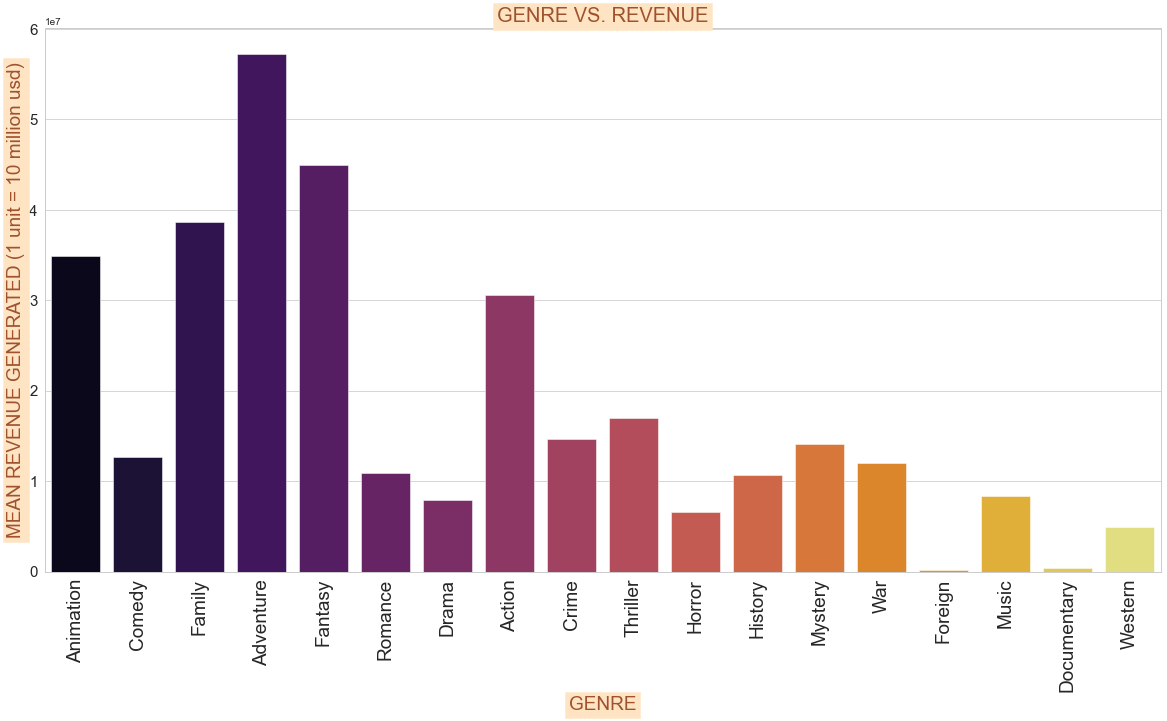

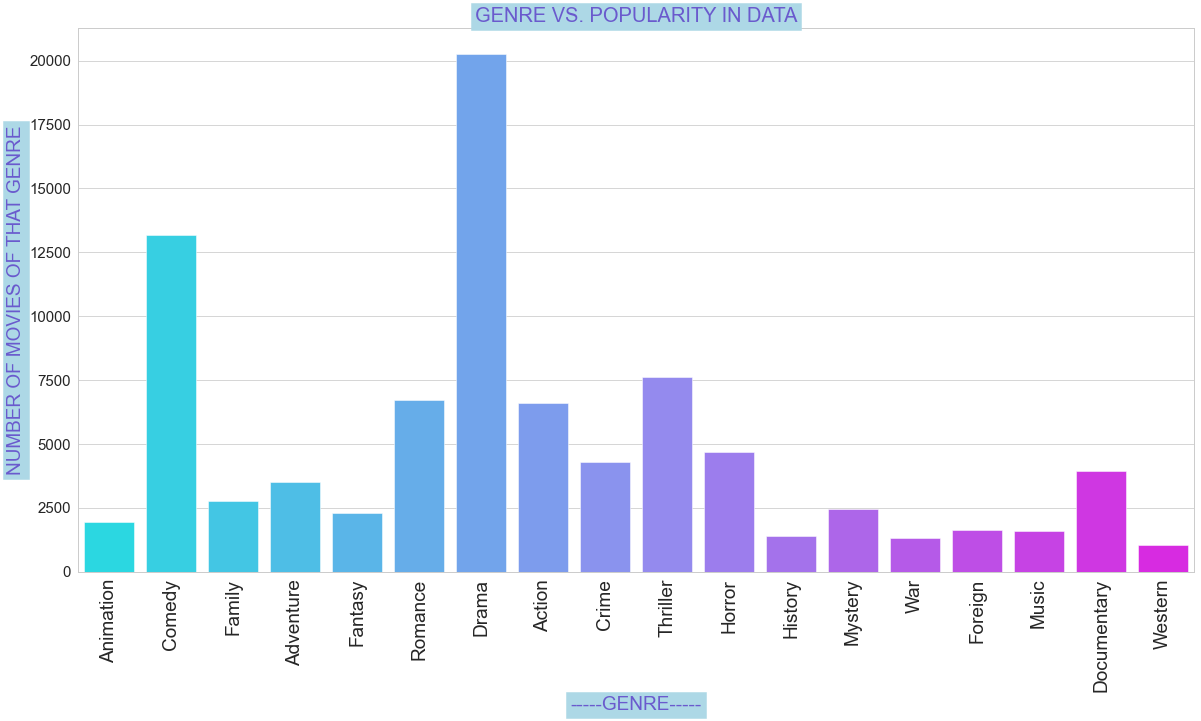

In [32]:
x=[]
y=[]
sns.set_style('whitegrid')
for i in data.columns[1:19]:
    x.append(f'{i}')
    y.append(round(data[data[f'{i}']==1]['revenue'].mean(),1))

plt.figure(figsize=(20,10))
    
plt.xticks(size=19, rotation=90)
plt.xlabel('GENRE', size=19, color='sienna', backgroundcolor='bisque')
plt.yticks(size=15)
plt.ylabel('MEAN REVENUE GENERATED (1 unit = 10 million usd)', size=19, color='sienna', backgroundcolor='bisque')
plt.title('GENRE VS. REVENUE',size=20,color='sienna',backgroundcolor='bisque', loc='center', fontsize=20)

sns.barplot(x=x,y=y, palette= 'inferno')
plt.show()

x=[]
y=[]
for i in data.columns[1:19]:
    x.append(i)
    y.append(data[data[f'{i}']==1].shape[0])


plt.figure(figsize=(20,10))
plt.xticks(size=19, rotation=90)
plt.xlabel('-----GENRE-----', size=19, color='slateblue', backgroundcolor='lightblue')
plt.yticks(size=15)
plt.ylabel('NUMBER OF MOVIES OF THAT GENRE', size=19, color='slateblue', backgroundcolor='lightblue')
plt.title('GENRE VS. POPULARITY IN DATA',size=20,color='slateblue',backgroundcolor='lightblue', loc='center', fontsize=20)
sns.barplot(x=x,y=y, palette= 'cool')
plt.show()

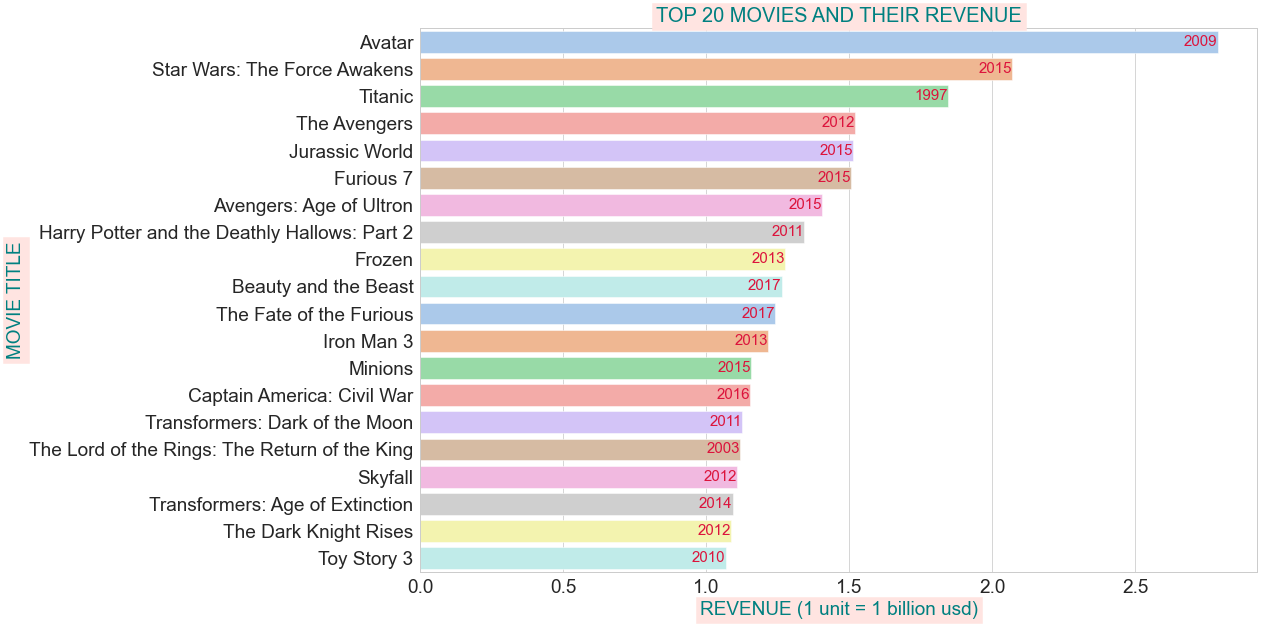

In [33]:
labels  = list(data.nlargest(20, 'revenue')['release_date'].values)
labels = [int(i[:4]) for i in labels]

x= []
x = list(data.nlargest(20, 'revenue')['title'].values)

y=[]
y = list(data.nlargest(20, 'revenue')['revenue'].values/(10**9))


plt.figure(figsize=(15,10))
plt.xticks(size=19)
plt.ylabel('MOVIE TITLE', size=19, color='teal', backgroundcolor='mistyrose')
plt.yticks(size=19)
plt.xlabel('REVENUE (1 unit = 1 billion usd)', size=19, color='teal', backgroundcolor='mistyrose')
plt.title('TOP 20 MOVIES AND THEIR REVENUE',size=20,color='teal',backgroundcolor='mistyrose', loc='center', fontsize=20)

for index, value in enumerate(y):
        plt.text(value, index, str(labels[index]), color='crimson', ha='right', va = 'center', fontsize=15)

sns.barplot(x=y,y=x, palette= 'pastel')
plt.show()

In [34]:
data['release_date'].fillna('0000-00-00', inplace=True)
data['release_date'].replace('nan', '0000-00-00',inplace=True)

In [35]:
data['release_date'] = data['release_date'].apply(lambda x: int(str(x).split('-')[0]))

In [36]:
for i in list(data['release_date'].unique()):
    try:
        if(i<1980):
            data['release_date'].replace(i, 'Vintage', inplace=True)
        elif(i<2005):
            data['release_date'].replace(i, 'Mid-era', inplace=True)
        elif(i>=2005):
            data['release_date'].replace(i, 'New', inplace = True)
    except:
        pass

In [37]:
data

,genres,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,...,overview,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count
0,"[Animation, Comedy, Family]",1,1,1,0,0,0,0,0,0,...,"Led by Woody, Andy's toys live happily in his ...",21.9469,Mid-era,373554033.0,81.0,Released,NaN,False,7.7,5415.0
1,"[Adventure, Fantasy, Family]",0,0,1,1,1,0,0,0,0,...,When siblings Judy and Peter discover an encha...,17.0155,Mid-era,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413.0
2,"[Romance, Comedy]",0,1,0,0,0,1,0,0,0,...,A family wedding reignites the ancient feud be...,11.7129,Mid-era,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0
3,"[Comedy, Drama, Romance]",0,1,0,0,0,1,1,0,0,...,"Cheated on, mistreated and stepped on, the wom...",3.85949,Mid-era,81452156.0,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34.0
4,[Comedy],0,1,0,0,0,0,0,0,0,...,Just when George Banks has recovered from his ...,8.38752,Mid-era,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,"[Drama, Family]",0,0,1,0,0,0,1,0,0,...,Rising and falling between a man and woman.,0.072051,Vintage,0.0,90.0,Released,Rising and falling between a man and woman,False,4.0,1.0
45462,[Drama],0,0,0,0,0,0,1,0,0,...,An artist struggles to finish his work while a...,0.178241,New,0.0,360.0,Released,NaN,False,9.0,3.0
45463,"[Action, Drama, Thriller]",0,0,0,0,0,0,1,1,0,...,"When one of her hits goes wrong, a professiona...",0.903007,Mid-era,0.0,90.0,Released,A deadly game of wits.,False,3.8,6.0
45464,[],0,0,0,0,0,0,0,0,0,...,"In a small town live two brothers, one a minis...",0.003503,Vintage,0.0,87.0,Released,NaN,False,0.0,0.0


In [38]:
data['release_date'].value_counts().sum() == data.shape[0]

True

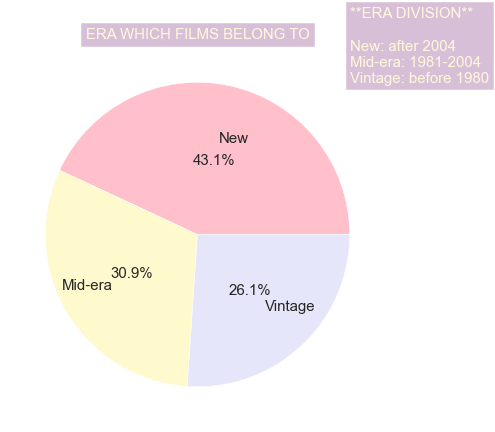

In [39]:
colors = ['pink', 'lemonchiffon', 'lavender']
plt.figure(figsize=(7,7))
labels= list(data['release_date'].value_counts().index)
x_os = list(data['release_date'].value_counts().values)
plt.pie(x_os, autopct="%1.1f%%", labels= labels, labeldistance=0.65 ,pctdistance=0.5,textprops = { "fontsize" : 15 }, colors=colors)
plt.title('Era which films belong to'.upper(), \
          size=14,color='cornsilk',backgroundcolor='thistle', loc='center', fontsize=15)
plt.text(1,1, '**ERA DIVISION**\n\nNew: after 2004\nMid-era: 1981-2004\nVintage: before 1980', size=15, color='cornsilk',backgroundcolor='thistle')
plt.show()

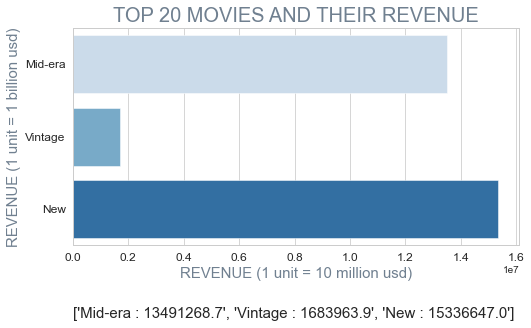

In [40]:
plt.figure(figsize=(8,4))
x=[]
y=[]
txt = []
for i in data.release_date.unique():
    x.append(i)
    y.append(round(data[data['release_date']==f'{i}']['revenue'].mean(),1))
    txt.append(f"{i}" + " : "+ str(round(data[data['release_date']==f'{i}']['revenue'].mean(),1)))

plt.xticks(size=12)
plt.xlabel('REVENUE (1 unit = 10 million usd)', size=15, color='slategray')
plt.yticks(size=12)
plt.ylabel('REVENUE (1 unit = 1 billion usd)', size=15, color='slategray')
plt.title('TOP 20 MOVIES AND THEIR REVENUE',size=20,color='slategray', loc='center', fontsize=20)
plt.text(6,3.5,txt, size=15)

sns.barplot(y,x, palette='Blues')
plt.show()


## 3. PRODUCTION COMPANIES

In [41]:
pc=[]
for i in df.production_companies:
    pci=[]
    text_to_search = str(i)
    pattern = re.compile("'name': .+?(?=,)")
    matches = re.findall( pattern, text_to_search) 
    for match in matches:
        pci.append(match[9:-1])
    pc.append(pci)
    

In [42]:
prod_comapnies_all=[]
pc_rank=[]
for i in df.production_companies:
    text_to_search = str(i)
    pattern = re.compile("'name': .+?(?=,)")
    matches = re.findall( pattern, text_to_search) 
    for match in matches:
        pc_rank.append(match[9:-1])
        if match[9:-1] not in prod_comapnies_all:
            prod_comapnies_all.append(match[9:-1])

In [43]:
len(prod_comapnies_all)

23535

In [44]:
len(pc_rank)

70545

In [45]:
pc_rank_data = pd.DataFrame(pc_rank)

In [46]:
pc_cols = ['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'title', 'release_date', 'revenue']

In [47]:
data['production_companies']= df[['production_companies']]

In [48]:
for i in range(len(pc)):
    data['production_companies'][i]= pc[i]

In [49]:
data.head()

,genres,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,...,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,production_companies
0,"[Animation, Comedy, Family]",1,1,1,0,0,0,0,0,0,...,21.9469,Mid-era,373554033.0,81.0,Released,NaN,False,7.7,5415.0,[Pixar Animation Studios]
1,"[Adventure, Fantasy, Family]",0,0,1,1,1,0,0,0,0,...,17.0155,Mid-era,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413.0,"[TriStar Pictures, Teitler Film, Interscope Co..."
2,"[Romance, Comedy]",0,1,0,0,0,1,0,0,0,...,11.7129,Mid-era,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,"[Warner Bros., Lancaster Gate]"
3,"[Comedy, Drama, Romance]",0,1,0,0,0,1,1,0,0,...,3.85949,Mid-era,81452156.0,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34.0,[Twentieth Century Fox Film Corporation]
4,[Comedy],0,1,0,0,0,0,0,0,0,...,8.38752,Mid-era,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0,"[Sandollar Productions, Touchstone Pictures]"


In [50]:
data[data['revenue']<100.0]['revenue'].value_counts()

0.0     38052
1.0        12
3.0         9
5.0         5
25.0        5
8.0         5
15.0        5
4.0         4
7.0         4
11.0        3
10.0        3
18.0        3
2.0         3
30.0        2
13.0        2
43.0        2
12.0        2
28.0        2
6.0         2
57.0        1
41.0        1
47.0        1
27.0        1
9.0         1
58.0        1
32.0        1
50.0        1
16.0        1
97.0        1
76.0        1
23.0        1
20.0        1
19.0        1
79.0        1
70.0        1
92.0        1
21.0        1
14.0        1
80.0        1
51.0        1
60.0        1
29.0        1
85.0        1
82.0        1
44.0        1
24.0        1
46.0        1
88.0        1
38.0        1
83.0        1
Name: revenue, dtype: int64

In [51]:
fig=round(data[data['revenue']>=100.0]['revenue'].mean(),2)
for i in range(0,100):
    data.revenue.replace(i, fig, inplace=True)

In [52]:
pc_revenue = [0 for _ in range(20)]
pc_count = [0 for _ in range(20)]
pc_avg=[0 for _ in range(20)]
top_20 = list(pc_rank_data[0].value_counts()[:20].index)
for j in range(20):
    for i in range(data.shape[0]):
        for company in data['production_companies'][i]:
            if company== top_20[j]:
                pc_revenue[j]+=  data['revenue'][i]
                pc_count[j]+=1
                
for _ in range(len(pc_count)):
    pc_avg[_] = pc_revenue[_]/pc_count[_]


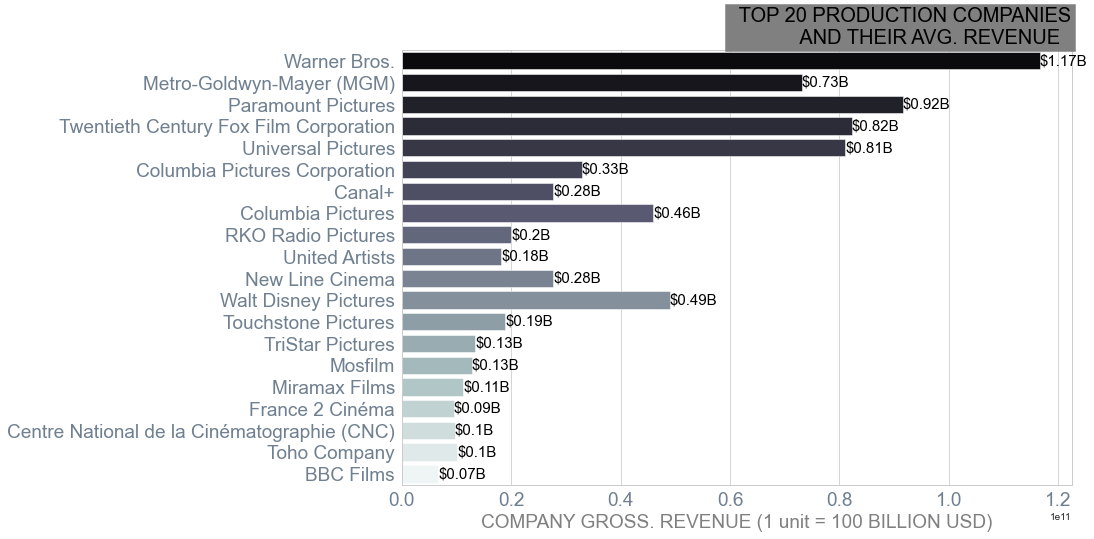

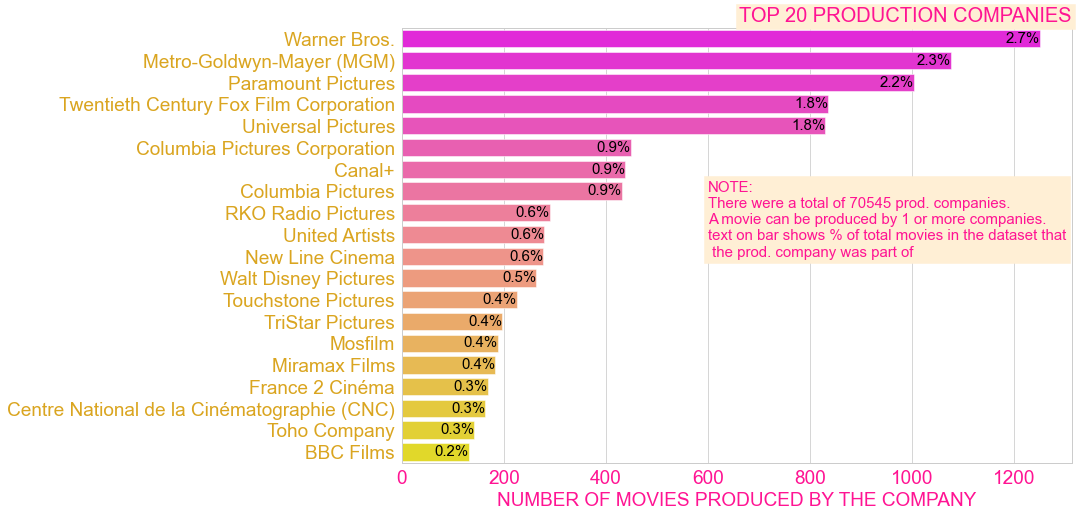

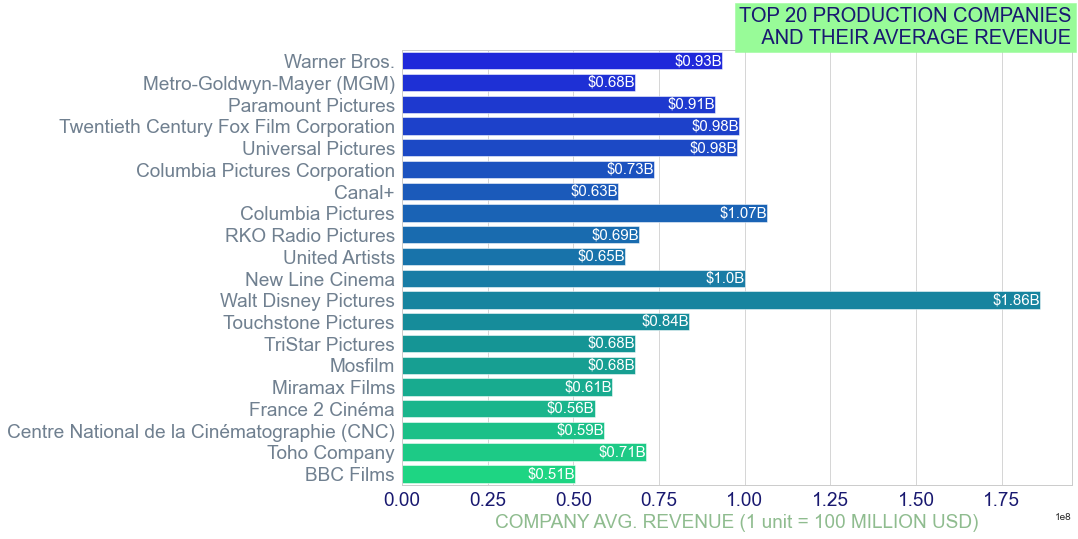

In [53]:
x=[]
y=[]
y_avg = []
for _ in range(20):
    x.append(top_20[_])
    y.append(pc_revenue[_])
    y_avg.append(pc_avg[_])

plt.figure(figsize=(12,8))
plt.xticks(size=19, color = 'slategrey')
plt.xlabel('COMPANY GROSS. REVENUE (1 unit = 100 BILLION USD)', size=19, color='grey')
plt.yticks(size=19, color = 'slategrey')

for index, value in enumerate(y):
        plt.text(value, index, str('$'+str(round(y[index]/10**11,2)) + 'B'), color='black', ha='left', va = 'center', fontsize=15)


plt.title('  TOP 20 PRODUCTION COMPANIES\n AND THEIR AVG. REVENUE  ',size=25,color='black', backgroundcolor='grey', loc='right', fontsize=20)
sns.barplot(x=y,y=x, palette= 'bone')
plt.show()

x = pc_rank_data[0].value_counts()[:20].values
y = pc_rank_data[0].value_counts()[:20].index
total = len(pc_rank)
plt.figure(figsize=(12,8))
plt.xticks(size=19, color = 'deeppink')
plt.xlabel("NUMBER OF MOVIES PRODUCED BY THE COMPANY", size=19, color = 'deeppink')
plt.yticks(size=19, color = 'goldenrod')
plt.title('TOP 20 PRODUCTION COMPANIES',size=25,color='deeppink',backgroundcolor='papayawhip', loc='right', fontsize=20)
s = 'NOTE:\nThere were a total of ' +str(total) +' prod. companies.\nA movie can be produced by 1 or more companies.'
s = s+ '\ntext on bar shows % of total movies in the dataset that\n the prod. company was part of'
for index, value in enumerate(x):
        plt.text(value, index, str((x[index]/data.shape[0])*100)[:3]+'%', color='black', ha='right', va = 'center', fontsize=15)

plt.text(600,10,s, color = 'deeppink', size=15 , backgroundcolor = 'papayawhip')
sns.barplot(x=x,y=y, palette= 'spring')
plt.show()

plt.figure(figsize=(12,8))
plt.xticks(size=19, color = 'midnightblue')
plt.xlabel('COMPANY AVG. REVENUE (1 unit = 100 MILLION USD)', size=19, color='darkseagreen')
plt.yticks(size=19, color = 'slategrey')

for index, value in enumerate(y_avg):
        plt.text(value, index, str('$'+str(round(y_avg[index]/10**8,2)) + 'B'), color='white', ha='right', va = 'center', fontsize=15)


plt.title('TOP 20 PRODUCTION COMPANIES\n AND THEIR AVERAGE REVENUE',size=20,color='midnightblue', loc='right', backgroundcolor='palegreen')
sns.barplot(x=y_avg,y=y, palette= 'winter')
plt.show()

## 4. PRODUCTION COUNTRIES

In [54]:
pct=[]
for i in df.production_companies:
    pcti=[]
    text_to_search = str(i)
    pattern = re.compile("'iso_3166_1': .+?(?=,)")
    matches = re.findall( pattern, text_to_search) 
    for match in matches:
        pcti.append(match[15:-1])
    pct.append(pcti)
    

In [55]:
prod_countries_all=[]
pct_rank=[]
for i in df.production_countries:
    text_to_search = str(i)
    pattern = re.compile("'iso_3166_1': .+?(?=,)")
    matches = re.findall( pattern, text_to_search) 
    for match in matches:
        pct_rank.append(match[15:-1])
        if match[15:-1] not in prod_countries_all:
            prod_countries_all.append(match[15:-1])

In [56]:
len(prod_countries_all)

161

In [57]:
data['production_countries']= df['production_countries']

In [58]:
for i in list(data.index):
    pct_convert=[]
    text_to_search = str(data['production_countries'][i])
    pattern = re.compile("'iso_3166_1': .+?(?=,)")
    matches = re.findall( pattern, text_to_search) 
    for match in matches:
        pct_convert.append(match[15:-1])
    data['production_countries'][i] = pct_convert

In [59]:
pct_rank_data = pd.DataFrame(pct_rank)

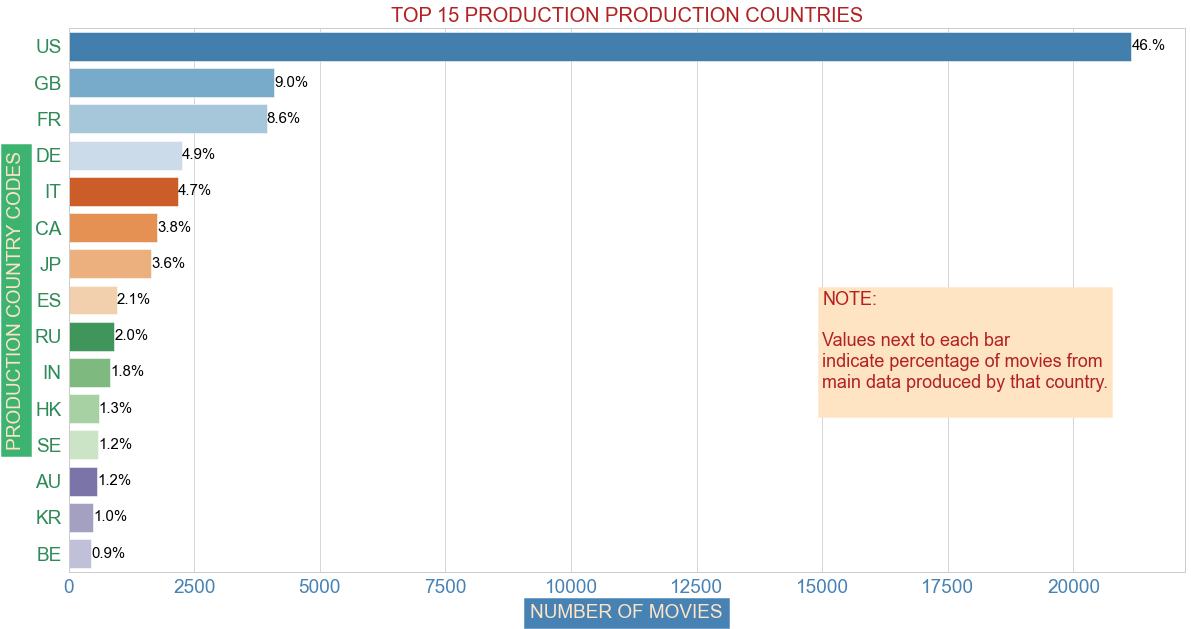

In [60]:
x = pct_rank_data[0].value_counts()[:15].values
y = pct_rank_data[0].value_counts()[:15].index
plt.figure(figsize=(20,10))
plt.xticks(size=19, color = 'steelblue')
plt.xlabel('NUMBER OF MOVIES', color='bisque', backgroundcolor= 'steelblue', size = 19, loc='center', labelpad=7)
plt.yticks(size=19, color = 'seagreen')
plt.ylabel('PRODUCTION COUNTRY CODES', color='bisque', backgroundcolor= 'mediumseagreen', size = 19, loc='center', labelpad=9)
plt.title('TOP 15 PRODUCTION PRODUCTION COUNTRIES',size=25,color='firebrick', loc='center', fontsize=20)
for index, value in enumerate(x):
        plt.text(value, index, str((x[index]/data.shape[0])*100)[:3]+'%', \
                 color='black', ha='left', va = 'center', fontsize=15)
        
plt.text(15000,10, 'NOTE:\n\nValues next to each bar \nindicate percentage of movies from\nmain data produced by that country.\n', \
        size=18, backgroundcolor = 'bisque', color='firebrick')    
sns.barplot(x=x,y=y, palette= 'tab20c')
plt.show()


In [61]:
pct_revenue = [0 for _ in range(15)]
pct_count = [0 for _ in range(15)]
pct_avg=[0 for _ in range(15)]
top_15 = list(pct_rank_data[0].value_counts()[:15].index)
for j in range(15):
    for i in range(data.shape[0]):
        for country in data['production_countries'][i]:
            if country== top_15[j]:
                pct_revenue[j]+=  data['revenue'][i]
                pct_count[j]+=1

                
for _ in range(len(pct_count)):
    pct_avg[_] = pct_revenue[_]/pct_count[_]


In [62]:
x=[]
y=[]
y_avg = []
for _ in range(15):
    x.append(top_15[_])
    y.append(pct_revenue[_])
    y_avg.append(pct_avg[_])

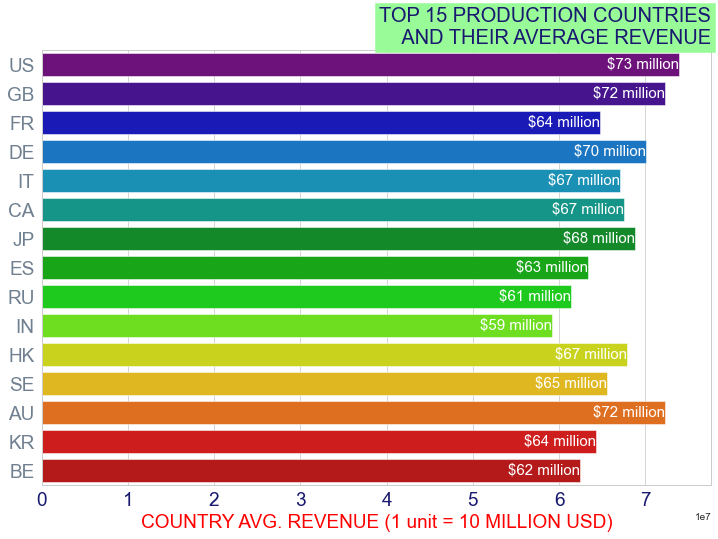

In [63]:
plt.figure(figsize=(12,8))
plt.xticks(size=19, color = 'midnightblue')
plt.xlabel('COUNTRY AVG. REVENUE (1 unit = 10 MILLION USD)', size=19, color='red')
plt.yticks(size=19, color = 'slategrey')

for index, value in enumerate(y_avg):
        plt.text(value, index, str('$'+str(round(y_avg[index]))[:2]+' million'), color='white', ha='right', va = 'center', fontsize=15)

plt.title('TOP 15 PRODUCTION COUNTRIES\n AND THEIR AVERAGE REVENUE',size=20,color='midnightblue', loc='right', backgroundcolor='palegreen')
sns.barplot(x=y_avg,y=x, palette= 'nipy_spectral')
plt.show()

## 4. RUNTIME

In [64]:
data.runtime.describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

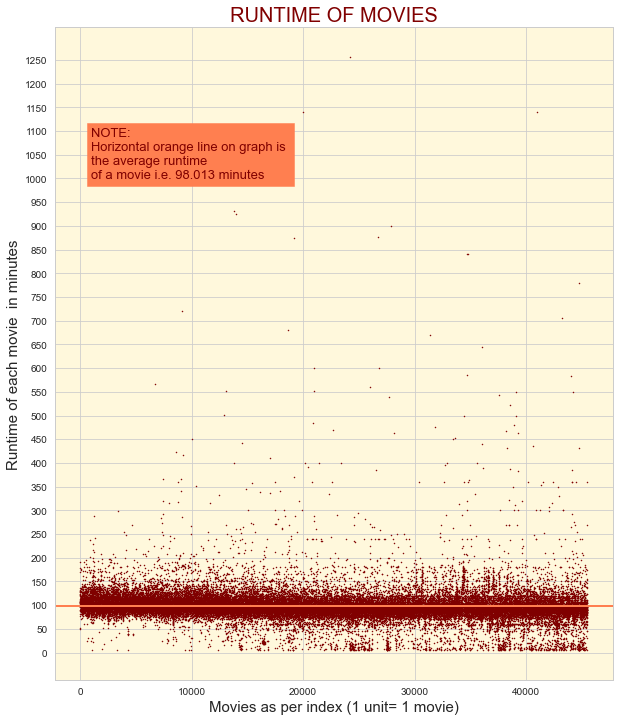

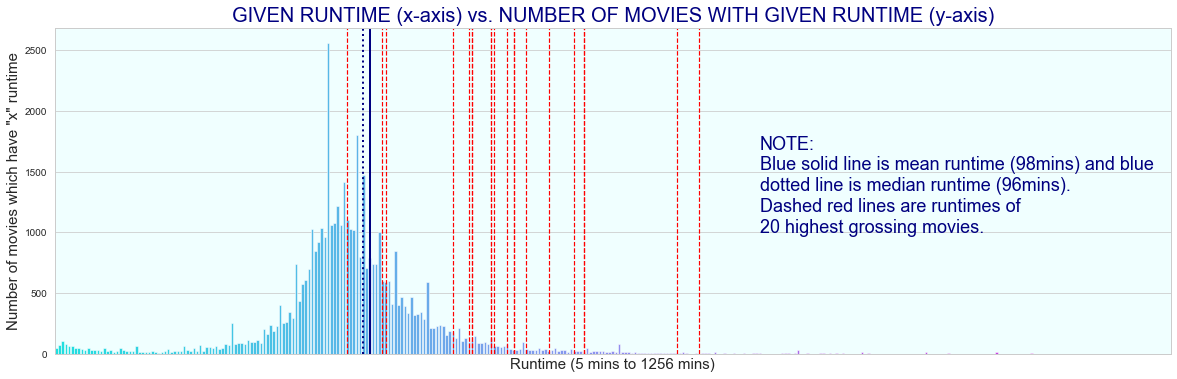

In [65]:
x = data['runtime'].index
y = data['runtime'].values

r_rep = list(data[data['runtime']<5]['runtime'].value_counts().index)
r_mean= round(data[data['runtime']>=5]['runtime'].mean(),3)
for i in r_rep:
    data['runtime'].replace(i, r_mean, inplace=True)

plt.figure(figsize= (10,12))
ax = plt.axes()
ax.set_facecolor("cornsilk")
plt.yticks(range(0, int(data['runtime'].max()), 50))
plt.ylabel('Runtime of each movie  in minutes', size=15)
plt.xlabel('Movies as per index (1 unit= 1 movie)', size=15)
plt.axhline(data['runtime'].mean(), color='coral', linewidth=2)
plt.text(1000,1000,'NOTE:\nHorizontal orange line on graph is \nthe average runtime \nof a movie i.e. 98.013 minutes'\
        , size=13, backgroundcolor='coral', color='maroon')
plt.title('RUNTIME OF MOVIES', size=20, color='maroon')
plt.scatter(x,y, s=1, color='maroon')
plt.show()

time = list(data['runtime'].value_counts().index)
vals = list(data['runtime'].value_counts().values)

r_dist = []
for i in range(len(time)):
    r_dist.append([time[i], vals[i]])

r_dist.sort()

x=[]
y=[]
 
for i in r_dist:
    x.append(i[0])
    y.append(i[1])

top_rev = list(data['revenue'].nlargest(20).index)
plt.figure(figsize=(20,6))
ax = plt.axes()
ax.set_facecolor("azure")
plt.axvline(data['runtime'].mean(), color='navy', linewidth=2)
plt.axvline(data['runtime'].median(), ls = ':',color='navy', linewidth=2)
for i in top_rev:
    plt.axvline(data.loc[i]['runtime'], color='red', ls="--",linewidth=1.2)
sns.barplot(x,y, palette = 'cool')
plt.text(220,1000,'NOTE:\nBlue solid line is mean runtime (98mins) and blue\ndotted line is median runtime (96mins).\nDashed red lines are runtimes of\n20 highest grossing movies.',\
        size = 18, color = 'navy')
plt.ylabel('Number of movies which have "x" runtime', size = 15)
plt.xlabel('Runtime (5 mins to 1256 mins)', size = 15)
plt.title('GIVEN RUNTIME (x-axis) vs. NUMBER OF MOVIES WITH GIVEN RUNTIME (y-axis)', color='navy', size=20)
plt.xticks([]) 
plt.show()

In [66]:
data[['revenue','runtime']].corr()

,revenue,runtime
revenue,1.000000,0.050969
runtime,0.050969,1.000000


In [67]:
pop_total=0.0
for i in data[data['popularity'].isnull()==False]['popularity']:
    try:
        pop_total+=float(i)
    except:
        data['popularity'].replace(i, 'NaN', inplace=True)

pop_len = len(data[data['popularity'].isnull()==False]['popularity'])
pop_avg = pop_total/pop_len

data['popularity'].replace(np.nan, str(pop_avg), inplace=True)
data['popularity'] = data['popularity'].astype(float)


In [68]:
data[['popularity', 'runtime']].corr()

,popularity,runtime
popularity,1.000000,0.106782
runtime,0.106782,1.000000


In [69]:
data[['vote_average', 'runtime']].corr()

,vote_average,runtime
vote_average,1.000000,0.118528
runtime,0.118528,1.000000


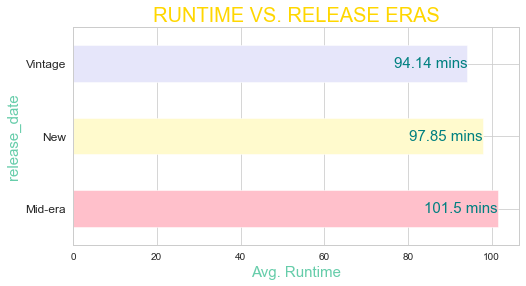

In [70]:
plt.figure(figsize=(8,4))
plt.title('RUNTIME VS. RELEASE ERAS', size=20, color= 'gold')
plt.yticks(fontsize=12)
y=data.groupby('release_date', )['runtime'].mean().values
plt.xlabel('Avg. Runtime', size=15, color= 'mediumaquamarine')
plt.ylabel('Rlease era', size=15, color= 'mediumaquamarine')
for index, value in enumerate(y):
        plt.text(value, index, str(round(y[index],2))+ ' mins', color='teal', ha='right', va = 'center', fontsize=15)

fig = data.groupby('release_date', )['runtime'].mean().plot(kind='barh', color = ['pink', 'lemonchiffon', 'lavender'])
plt.show()

## 5. VOTE COUNT, VOTE AVERAGE AND POPULARITY

In [71]:
data[data['vote_average'].isnull()==True]

,genres,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,...,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,production_companies,production_countries
19729,"[Action, Thriller, Drama]",0,0,0,0,0,0,1,1,0,...,Vintage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[]
19730,[],0,0,0,0,0,0,0,0,0,...,Vintage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[]
29502,[Animation],1,0,0,0,0,0,0,0,0,...,Vintage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[]
29503,"[Aniplex, GoHands]",0,0,0,0,0,0,0,0,0,...,Vintage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[]
35586,"[Action, Horror]",0,0,0,0,0,0,0,1,0,...,Vintage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[]
35587,[],0,0,0,0,0,0,0,0,0,...,Vintage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[]


In [72]:
for i in data[data['vote_average'].isnull()==True].index:
    data.drop(i, inplace=True)

In [73]:
data[['vote_count', 'vote_average', 'popularity']].describe()

,vote_count,vote_average,popularity
count,45460.000000,45460.000000,45460.000000
mean,109.897338,5.618207,2.921478
std,491.310374,1.924216,6.005414
min,0.000000,0.000000,0.000000
25%,3.000000,5.000000,0.385948
50%,10.000000,6.000000,1.127685
75%,34.000000,6.800000,3.678902
max,14075.000000,10.000000,547.488298


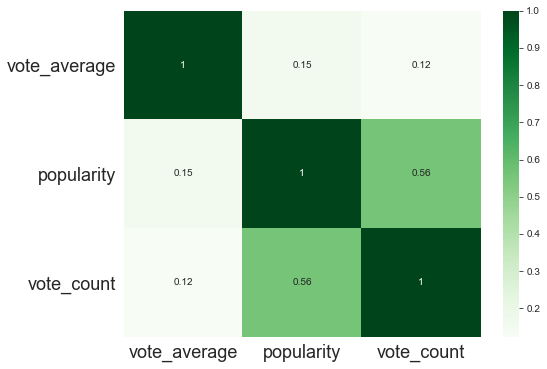

In [74]:
plt.figure(figsize=(8,6))
plt.xticks(size=18)
plt.yticks(size=18)
sns.heatmap(data[['vote_average', 'popularity', 'vote_count']].corr(), annot=True, cmap='Greens')
plt.show()

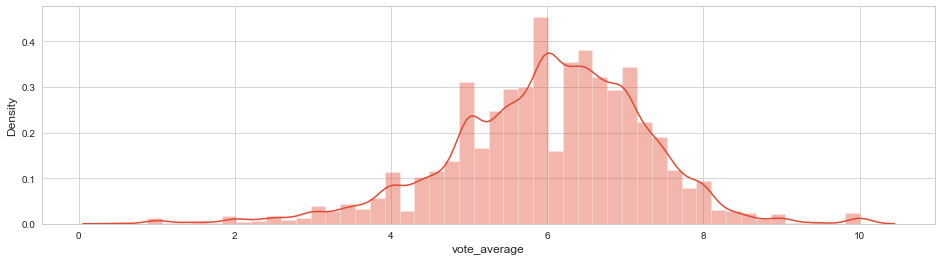

In [75]:
plt.figure(figsize=(16,4))
sns.distplot(data[data['vote_average']>0]['vote_average'])
plt.show()

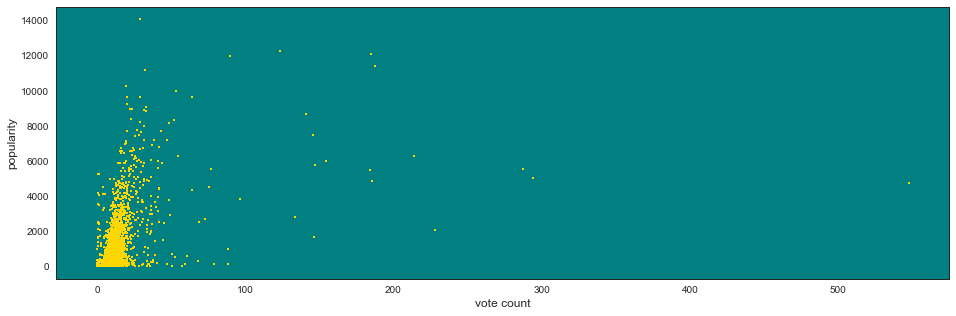

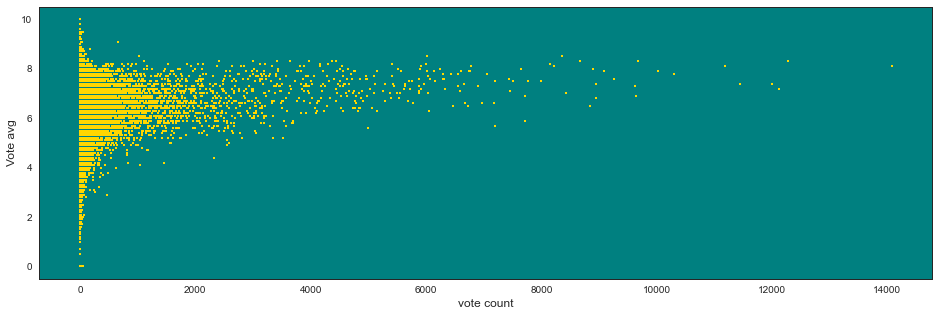

In [76]:
sns.set_style('white')
plt.figure(figsize=(16,5))

plt.subplot(2,1,1)
ax = plt.axes()
ax.set_facecolor("teal")
plt.scatter(x= data['popularity'], y = data['vote_count'],  marker='+', s=3, color= 'gold')
plt.ylabel('popularity')
plt.xlabel('vote count')
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2,1,2)
ax = plt.axes()
ax.set_facecolor("teal")
plt.scatter(y = data['vote_average'],x= data['vote_count'], marker='+', s=3, color= 'gold')
plt.ylabel('Vote avg')
plt.xlabel('vote count')
plt.show()

In [77]:
data.loc[data.popularity.nlargest(20).index][['title', 'popularity', 'vote_average']]

,title,popularity,vote_average
30700,Minions,547.488298,6.4
33356,Wonder Woman,294.337037,7.2
42222,Beauty and the Beast,287.253654,6.8
43644,Baby Driver,228.032744,7.2
24455,Big Hero 6,213.849907,7.8
26564,Deadpool,187.860492,7.4
26566,Guardians of the Galaxy Vol. 2,185.330992,7.6
14551,Avatar,185.070892,7.2
24351,John Wick,183.870374,7.0
23675,Gone Girl,154.801009,7.9


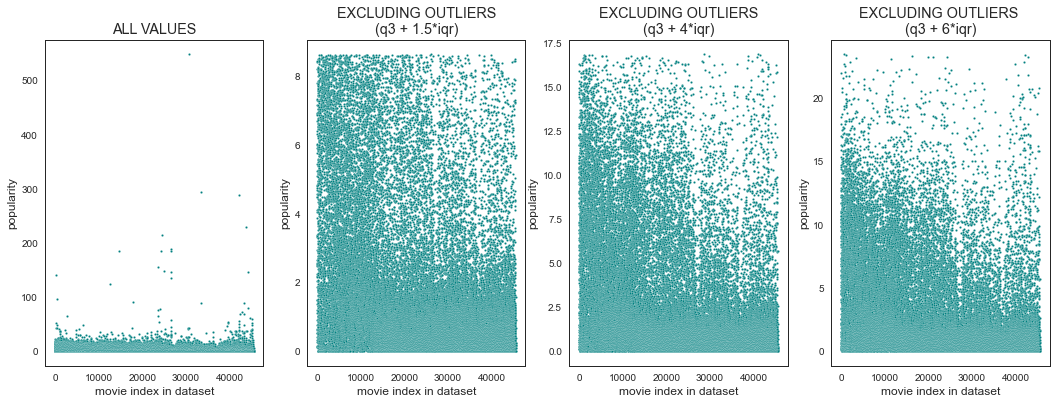

In [78]:
plt.figure(figsize= (18,6))
plt.subplot(1,4,1)
plt.xlabel("movie index in dataset")
sns.scatterplot(data.index, data.popularity, s = 5, color = 'teal')
plt.title('ALL VALUES')

q1 = data['popularity'].quantile(0.25)
q3 = data['popularity'].quantile(0.75)
iqr = q3-q1
h_out = q3 + 1.5*iqr

plt.subplot(1,4,2)
plt.xlabel("movie index in dataset")
x = data[data['popularity']< h_out].index
y = data[data['popularity']< h_out]['popularity']
sns.scatterplot(x,y, s = 5, color = 'teal')
plt.title('EXCLUDING OUTLIERS\n(q3 + 1.5*iqr)')

h_out = q3 + 4*iqr

plt.subplot(1,4,3)
plt.xlabel("movie index in dataset")
x = data[data['popularity']< h_out].index
y = data[data['popularity']< h_out]['popularity']
sns.scatterplot(x,y, s = 5, color = 'teal')
plt.title('EXCLUDING OUTLIERS\n(q3 + 4*iqr)')

h_out = q3 + 6*iqr

plt.subplot(1,4,4)
plt.xlabel("movie index in dataset")
x = data[data['popularity']< h_out].index
y = data[data['popularity']< h_out]['popularity']
sns.scatterplot(x,y, s = 5, color = 'teal')
plt.title('EXCLUDING OUTLIERS \n(q3 + 6*iqr)')
plt.show()


In [79]:
num = data.loc[data['popularity'].sort_values(ascending = False).index[:50]][['title', 'adult', 'budget',
       'original_language', 'popularity',
       'release_date', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'production_companies',
       'production_countries']]

In [80]:
#top 50 popular
num.describe().loc[['mean', '50%', 'std']]

,popularity,revenue,runtime,vote_average,vote_count
mean,106.264897,5.008945e+08,121.760260,6.786000,4674.580000
50%,68.340864,3.525315e+08,121.500000,7.000000,4481.500000
std,91.243916,5.189302e+08,22.306996,1.373957,3518.722908


In [81]:
#main data
data[['popularity','revenue','runtime','vote_average','vote_count']].describe().loc[['mean', '50%', 'std']]

,popularity,revenue,runtime,vote_average,vote_count
mean,2.921478,6.976684e+07,98.013082,5.618207,109.897338
50%,1.127685,6.976684e+07,96.000000,6.000000,10.000000
std,6.005414,5.901044e+07,33.325235,1.924216,491.310374


In [82]:
#difference between main data and top 50 popular
compare = num.describe()-data[['popularity','revenue','runtime','vote_average','vote_count']].describe()
compare.loc[['mean','50%', 'std']]

,popularity,revenue,runtime,vote_average,vote_count
mean,103.343419,4.311276e+08,23.747178,1.167793,4564.682662
50%,67.213179,2.827646e+08,25.500000,1.000000,4471.500000
std,85.238502,4.599198e+08,-11.018238,-0.550259,3027.412534


In [83]:
print("*****MOVIES WHICH ARE IN 50 MOST POPULAR AND 50 MOST HIGH-RATED*****\n\n")
sno=0
for i in data[data['vote_count']>1000]['vote_average'].sort_values(ascending = False)[:50].index:
    for j in data['popularity'].sort_values(ascending = False)[:50].index:
        if i==j:
            sno+=1
            print(sno, ':',data.loc[i]['title'].upper(), \
                  '\n vote avg:',data.loc[i]['vote_average'], '\n popularity', round(data.loc[i]['popularity'],2))
            print('-'*40)

*****MOVIES WHICH ARE IN 50 MOST POPULAR AND 50 MOST HIGH-RATED*****


1 : THE SHAWSHANK REDEMPTION 
 vote avg: 8.5 
 popularity 51.65
----------------------------------------
2 : WHIPLASH 
 vote avg: 8.3 
 popularity 64.3
----------------------------------------
3 : SCHINDLER'S LIST 
 vote avg: 8.3 
 popularity 41.73
----------------------------------------
4 : PULP FICTION 
 vote avg: 8.3 
 popularity 140.95
----------------------------------------
5 : THE DARK KNIGHT 
 vote avg: 8.3 
 popularity 123.17
----------------------------------------
6 : FIGHT CLUB 
 vote avg: 8.3 
 popularity 63.87
----------------------------------------
7 : FORREST GUMP 
 vote avg: 8.2 
 popularity 48.31
----------------------------------------
8 : STAR WARS 
 vote avg: 8.1 
 popularity 42.15
----------------------------------------


In [84]:
print("*****MOVIES WHICH ARE IN 50 HIGHEST GROSSING AND 50 MOST HIGH-RATED*****\n\n")
sno=0
for i in data[data['vote_count']>1000]['vote_average'].sort_values(ascending = False)[:50].index:
    for j in data['revenue'].sort_values(ascending = False)[:50].index:
        if i==j:
            sno+=1
            print(sno, ':',data.loc[i]['title'].upper(), \
                  '\n vote avg:',data.loc[i]['vote_average'], '\n revenue', round(data.loc[i]['revenue'],2))
            print('-'*40)

*****MOVIES WHICH ARE IN 50 HIGHEST GROSSING AND 50 MOST HIGH-RATED*****


1 : THE DARK KNIGHT 
 vote avg: 8.3 
 revenue 1004558444.0
----------------------------------------
2 : THE LORD OF THE RINGS: THE RETURN OF THE KING 
 vote avg: 8.1 
 revenue 1118888979.0
----------------------------------------


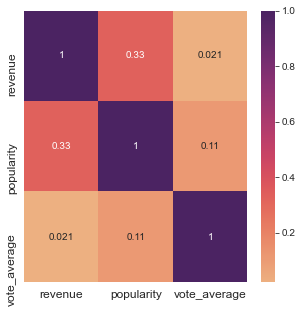

In [85]:
plt.figure(figsize=(5,5))
plt.xticks(size=12)
plt.yticks(size=12)
sns.heatmap(data= data[data['vote_count']>1000][['revenue', 'popularity', 'vote_average']].corr(), cmap= 'flare', annot =True)
plt.show()

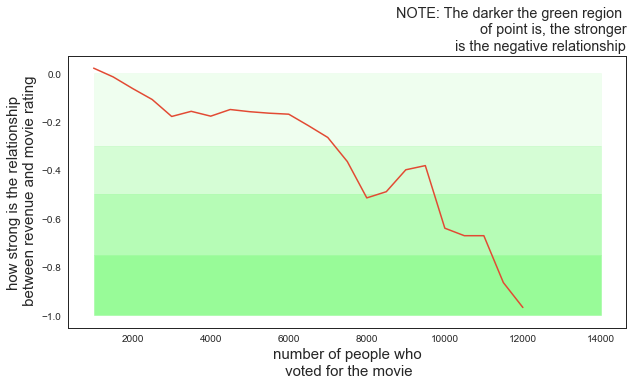

In [86]:
x=[]
y=[]
for i in np.arange(1000,data.vote_count.max(),500):
    x.append(i)
    y.append(data[data['vote_count']> i].corr().loc['revenue']['vote_average'])

    
plt.figure(figsize=(10,5))
plt.xlabel('number of people who\n voted for the movie', size=15)
plt.ylabel('how strong is the relationship\n between revenue and movie rating', size=15)

plt.fill_between(x, 0,-0.3, color='palegreen', alpha=0.15)
plt.fill_between(x, -0.3,-0.5, color='palegreen', alpha=0.4)
plt.fill_between(x, -0.5,-0.75, color='palegreen', alpha=0.7)
plt.fill_between(x, -0.75,-1.0, color='palegreen', alpha=1)
sns.lineplot(x,y)
plt.title('NOTE: The darker the green region \nof point is, the stronger\n is the negative relationship', loc='right')
plt.show()

## 6. BUDGET

In [87]:
data['budget'] = data['budget'].astype(int)

In [88]:
data['budget'].isnull().any()

False

In [89]:
data['budget'].describe()

count    4.546000e+04
mean     4.224858e+06
std      1.742467e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [90]:
data[['budget', 'revenue', 'vote_average', 'vote_count']].corr().loc['budget']

budget          1.000000
revenue         0.634556
vote_average    0.073494
vote_count      0.676642
Name: budget, dtype: float64

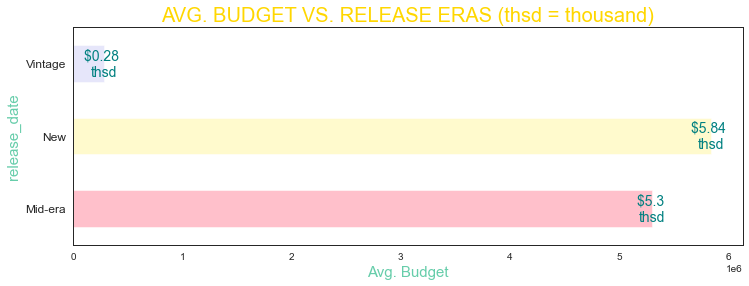

In [91]:
plt.figure(figsize=(12,4))
plt.title('AVG. BUDGET VS. RELEASE ERAS (thsd = thousand)', size=20, color= 'gold')
plt.yticks(fontsize=12)
y=data.groupby('release_date', )['budget'].mean().values
plt.xlabel('Avg. Budget', size=15, color= 'mediumaquamarine')
plt.ylabel('Rlease era', size=15, color= 'mediumaquamarine')
for index, value in enumerate(y):
        plt.text(value, index, "$"+str(round(y[index]*(10**-6),2))+" \nthsd", color='teal', ha='center', va = 'center', fontsize=14)

fig = data.groupby('release_date', )['budget'].mean().plot(kind='barh', color = ['pink', 'lemonchiffon', 'lavender'])
plt.show()

In [92]:
rep=round(data[data['budget']>=100]['budget'].mean(),0)
for i in data[data['budget']<100].budget.unique():
    data['budget'].replace(i, rep, inplace=True)

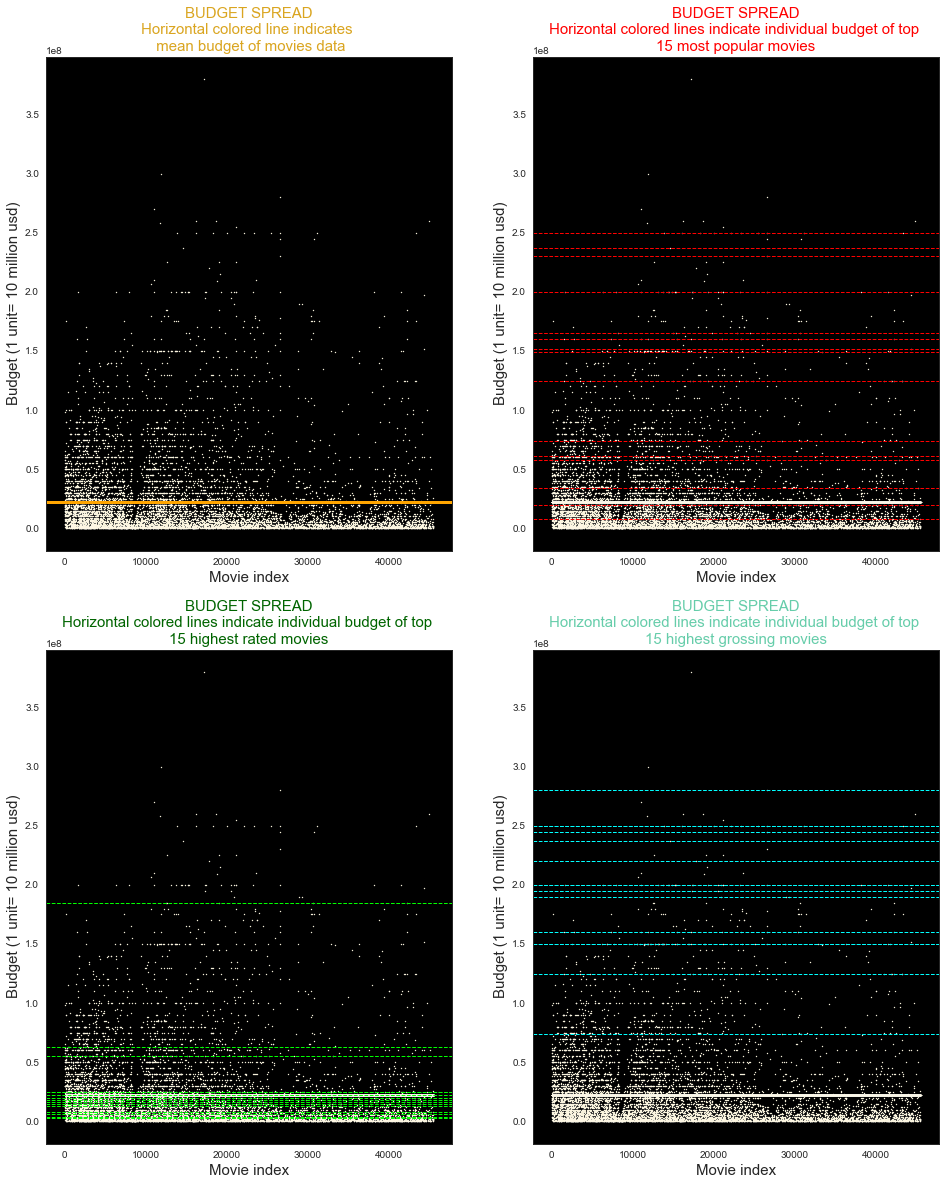

In [93]:
txt  = 'Horizontal colored line indicates \n mean budget of movies data'
txt1 = 'Horizontal colored lines indicate individual budget of top \n15 most popular movies'
txt2 = 'Horizontal colored lines indicate individual budget of top \n15 highest rated movies'
txt3 = 'Horizontal colored lines indicate individual budget of top \n15 highest grossing movies'

x = data['budget'].index
y = data['budget'].values

plt.figure(figsize= (16,20))

plt.subplot(2,2,1, facecolor='black')
plt.ylabel("Budget (1 unit= 10 million usd)", size=15)
plt.xlabel("Movie index", size=15)
plt.title("BUDGET SPREAD\n"+txt, c = 'goldenrod', size=15)
plt.axhline(y.mean(), color='orange',linewidth=3)
sns.scatterplot(x,y, s=1.5, color='cornsilk')


top1 = data.loc[data['popularity'].nlargest(15).index]['budget'].values

plt.subplot(2,2,2, facecolor='black')
plt.ylabel("")
plt.title("BUDGET SPREAD\n"+txt1,  c = 'red', size=15)
plt.ylabel("Budget (1 unit= 10 million usd)", size=15)
plt.xlabel("Movie index", size=15)
for i in top1:
    plt.axhline(i, color='red', ls="--",linewidth=1)
sns.scatterplot(x,y, s=1.5, color='cornsilk')

top2 = data.loc[data[data['vote_count']>2500]['vote_average'].nlargest(15).index]['budget'].values

plt.subplot(2,2,3, facecolor='black')
plt.ylabel("Budget (1 unit= 10 million usd)", size=15)
plt.xlabel("Movie index", size=15)
plt.title("BUDGET SPREAD\n"+txt2,  c = 'darkgreen', size=15)
for i in top2:
    plt.axhline(i, color='lime', ls="--",linewidth=1)
sns.scatterplot(x,y, s=1.5, color='cornsilk')

top3 = data.loc[data['revenue'].nlargest(15).index]['budget'].values

plt.subplot(2,2,4, facecolor='black')
plt.ylabel("Budget (1 unit= 10 million usd)", size=15)
plt.xlabel("Movie index", size=15)
plt.ylabel("Budget (1 unit= 10 million usd)", size=15)
plt.title("BUDGET SPREAD\n"+txt3, c = 'mediumaquamarine', size=15)
for i in top3:
    plt.axhline(i, color='cyan', ls="--",linewidth=1)
sns.scatterplot(x,y, s=1.5, color='cornsilk')

plt.show()

## 7. ALL TIME CLASSIC FILMS

##### LIST TO STR:  data['genres_m'] = data.genres.apply(lambda x: ', '.join([str(i) for i in x]))

In [94]:
data['genres'] = data.genres.apply(lambda x: ', '.join([str(i) for i in x]))

In [95]:
most_pop = data.loc[data['popularity'].nlargest(170).index][['title', 'genres',
                                                             'original_language', 'runtime', 'adult', 'release_date']]
most_rev = data.loc[data['revenue'].nlargest(170).index][['title', 'genres', 'original_language',
                                                          'runtime', 'adult', 'release_date']]
most_rated = data.iloc[data[data['vote_count']>1000]['vote_average'].nlargest(170).index][['title', 'genres', 
                                                            'original_language', 'runtime', 'adult', 'release_date']]

## SUMMARY OF MOVIES THAT ARE HIGH RATED, BOX OFFICE HITS AND VERY POPULAR

In [96]:
classic = pd.merge(most_pop, most_rated)
classic=classic.merge(most_rev)
classic['s.no.']= range(1,11)
classic.set_index('s.no.')

,title,genres,original_language,runtime,adult,release_date
s.no.,,,,,,
1,The Dark Knight,"Drama, Action, Crime, Thriller",en,152.0,False,New
2,Forrest Gump,"Comedy, Drama, Romance",en,142.0,False,Mid-era
3,Star Wars,"Adventure, Action",en,121.0,False,Vintage
4,The Lord of the Rings: The Fellowship of the Ring,"Adventure, Fantasy, Action",en,178.0,False,Mid-era
5,The Lord of the Rings: The Two Towers,"Adventure, Fantasy, Action",en,179.0,False,Mid-era
6,The Lord of the Rings: The Return of the King,"Adventure, Fantasy, Action",en,201.0,False,Mid-era
7,Inception,"Action, Thriller, Mystery, Adventure",en,148.0,False,New
8,Harry Potter and the Prisoner of Azkaban,"Adventure, Fantasy, Family",en,141.0,False,Mid-era
9,Finding Nemo,"Animation, Family",en,100.0,False,Mid-era


### EXTENDING DATASET

In [97]:
cred = pd.read_csv('/Users/padminiyadav/movie_rec_project/credits.csv')

crew=[]
for i in cred.crew:
    crew_i=[]
    text_to_search = str(i)
    pattern = re.compile("'name': .+?(?=,)")
    matches = re.findall( pattern, text_to_search) 
    for match in matches:
        crew_i.append(match[9:-1])
    crew.append(crew_i)

cast=[]
for i in cred.cast:
    cast_i=[]
    text_to_search = str(i)
    pattern = re.compile("'name': .+?(?=,)")
    matches = re.findall( pattern, text_to_search) 
    for match in matches:
        cast_i.append(match[9:-1])
    cast.append(cast_i)
    

cred['cast']=cast
cred['crew']=crew

kwrds = pd.read_csv('/Users/padminiyadav/movie_rec_project/keywords.csv')
kwrd=[]
for i in kwrds.keywords:
    kwrd_i=[]
    text_to_search = str(i)
    pattern = re.compile("'name\': .+?(?=})")
    matches = re.findall(pattern, text_to_search) 
    for match in matches:
        kwrd_i.append(match[9:-1])
    kwrd.append(kwrd_i)

kwrds['keywords']=kwrd
kwrds = kwrds.merge(cred, on='id')

data['id']=data['id'].astype(int)

data = data.merge(kwrds, on='id')

### EDA cast, crew, keywords

# MACHINE LEARNING

In [98]:
data.head(3)

,genres,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,...,status,tagline,video,vote_average,vote_count,production_companies,production_countries,keywords,cast,crew
0,"Animation, Comedy, Family",1,1,1,0,0,0,0,0,0,...,Released,NaN,False,7.7,5415.0,[Pixar Animation Studios],[US],"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J..."
1,"Adventure, Fantasy, Family",0,0,1,1,1,0,0,0,0,...,Released,Roll the dice and unleash the excitement!,False,6.9,2413.0,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho..."
2,"Romance, Comedy",0,1,0,0,0,1,0,0,0,...,Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,"[Warner Bros., Lancaster Gate]",[US],"[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev..."


In [99]:
data.columns

Index(['genres', 'Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western',
       'Aniplex', 'GoHands', 'title', 'adult', 'budget', 'id',
       'original_language', 'original_title', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'video',
       'vote_average', 'vote_count', 'production_companies',
       'production_countries', 'keywords', 'cast', 'crew'],
      dtype='object')

In [100]:
data[['title', 'adult', 'budget', 'id',
       'original_language',  'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'tagline',
       'vote_average', 'vote_count', 'production_companies',
       'production_countries', 'genres', 'keywords', 'cast', 'crew']]

,title,adult,budget,id,original_language,overview,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,production_companies,production_countries,genres,keywords,cast,crew
0,Toy Story,False,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Mid-era,3.735540e+08,81.0,NaN,7.7,5415.0,[Pixar Animation Studios],[US],"Animation, Comedy, Family","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J..."
1,Jumanji,False,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,Mid-era,2.627972e+08,104.0,Roll the dice and unleash the excitement!,6.9,2413.0,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],"Adventure, Fantasy, Family","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho..."
2,Grumpier Old Men,False,21944930,15602,en,A family wedding reignites the ancient feud be...,11.712900,Mid-era,6.976684e+07,101.0,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[Warner Bros., Lancaster Gate]",[US],"Romance, Comedy","[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev..."
3,Waiting to Exhale,False,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Mid-era,8.145216e+07,127.0,Friends are the people who let you be yourself...,6.1,34.0,[Twentieth Century Fox Film Corporation],[US],"Comedy, Drama, Romance","[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez..."
4,Father of the Bride Part II,False,21944930,11862,en,Just when George Banks has recovered from his ...,8.387519,Mid-era,7.657891e+07,106.0,Just When His World Is Back To Normal... He's ...,5.7,173.0,"[Sandollar Productions, Touchstone Pictures]",[US],Comedy,"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46619,Subdue,False,21944930,439050,fa,Rising and falling between a man and woman.,0.072051,Vintage,6.976684e+07,90.0,Rising and falling between a man and woman,4.0,1.0,[],[IR],"Drama, Family",[tragic love],"[Leila Hatami, Kourosh Tahami, Elham Korda]","[Hamid Nematollah, Hamid Nematollah, Farshad M..."
46620,Century of Birthing,False,21944930,111109,tl,An artist struggles to finish his work while a...,0.178241,New,6.976684e+07,360.0,NaN,9.0,3.0,[Sine Olivia],[PH],Drama,"[artist, play, pinoy]","[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...","[Lav Diaz, Lav Diaz, Dante Perez, Lav Diaz, La..."
46621,Betrayal,False,21944930,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,Mid-era,6.976684e+07,90.0,A deadly game of wits.,3.8,6.0,[American World Pictures],[US],"Action, Drama, Thriller",[],"[Erika Eleniak, Adam Baldwin, Julie du Page, J...","[Mark L. Lester, C. Courtney Joyner, Jeffrey G..."
46622,Satan Triumphant,False,21944930,227506,en,"In a small town live two brothers, one a minis...",0.003503,Vintage,6.976684e+07,87.0,NaN,0.0,0.0,[Yermoliev],[RU],,[],"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...","[Yakov Protazanov, Joseph N. Ermolieff]"


In [101]:
data['keywords'] = data.keywords.apply(lambda x: ' '.join([str(i) for i in x]))

In [102]:
data['production_companies'] = data.production_companies.apply(lambda x: ' '.join([str(i) for i in x]))

In [103]:
data['production_countries'] = data.production_countries.apply(lambda x: ' '.join([str(i) for i in x]))

In [104]:
data['cast'] = data.cast.apply(lambda x: ' '.join([str(i) for i in x]))

In [105]:
data['crew'] = data.crew.apply(lambda x: ' '.join([str(i) for i in x]))

In [106]:
data.drop(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western',
       'Aniplex', 'GoHands', 'status', 'video'], axis=1, inplace=True)

In [107]:
data.head(2)

,genres,title,adult,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,production_companies,production_countries,keywords,cast,crew
0,"Animation, Comedy, Family",Toy Story,False,30000000,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Mid-era,373554033.0,81.0,NaN,7.7,5415.0,Pixar Animation Studios,US,jealousy toy boy friendship friends rivalry bo...,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter Joss Whedon Andrew Stanton Joel ...
1,"Adventure, Fantasy, Family",Jumanji,False,65000000,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,Mid-era,262797249.0,104.0,Roll the dice and unleash the excitement!,6.9,2413.0,TriStar Pictures Teitler Film Interscope Commu...,US,board game disappearance based on children's b...,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Larry J. Franco Jonathan Hensleigh James Horne...


In [108]:
data['tagline'].fillna(data['keywords']+' '+data['genres'], inplace=True)

In [109]:
data['tagline'].isnull().any()

False

In [110]:
data['overview'].fillna(data['tagline'].apply(lambda x: ' '.join(x.split(' '))), inplace=True)

In [111]:
data['overview'].isnull().sum()

0

In [112]:
data.isnull().sum()

genres                    0
title                     0
adult                     0
budget                    0
id                        0
original_language        11
original_title            0
overview                  0
popularity                0
release_date              0
revenue                   0
runtime                 264
tagline                   0
vote_average              0
vote_count                0
production_companies      0
production_countries      0
keywords                  0
cast                      0
crew                      0
dtype: int64

In [113]:
data['original_language'].fillna('unknown', inplace=True)

In [114]:
data['runtime'].fillna(round(data[data['runtime'] !=0]['runtime'].mean(),0), inplace = True)

In [115]:
data.isnull().sum()

genres                  0
title                   0
adult                   0
budget                  0
id                      0
original_language       0
original_title          0
overview                0
popularity              0
release_date            0
revenue                 0
runtime                 0
tagline                 0
vote_average            0
vote_count              0
production_companies    0
production_countries    0
keywords                0
cast                    0
crew                    0
dtype: int64

In [116]:
data.head(3)

,genres,title,adult,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,production_companies,production_countries,keywords,cast,crew
0,"Animation, Comedy, Family",Toy Story,False,30000000,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Mid-era,3.735540e+08,81.0,jealousy toy boy friendship friends rivalry bo...,7.7,5415.0,Pixar Animation Studios,US,jealousy toy boy friendship friends rivalry bo...,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter Joss Whedon Andrew Stanton Joel ...
1,"Adventure, Fantasy, Family",Jumanji,False,65000000,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,Mid-era,2.627972e+08,104.0,Roll the dice and unleash the excitement!,6.9,2413.0,TriStar Pictures Teitler Film Interscope Commu...,US,board game disappearance based on children's b...,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Larry J. Franco Jonathan Hensleigh James Horne...
2,"Romance, Comedy",Grumpier Old Men,False,21944930,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,Mid-era,6.976684e+07,101.0,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,Warner Bros. Lancaster Gate,US,fishing best friend duringcreditsstinger old men,Walter Matthau Jack Lemmon Ann-Margret Sophia ...,Howard Deutch Mark Steven Johnson Mark Steven ...


## ML MODEL BUILDING

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [118]:
data_content = data[['title', 'adult', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date',
       'runtime', 'tagline', 'vote_average', 'vote_count',
        'keywords']]

In [119]:
data_content.head(2)

,title,adult,original_language,original_title,overview,popularity,release_date,runtime,tagline,vote_average,vote_count,keywords
0,Toy Story,False,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Mid-era,81.0,jealousy toy boy friendship friends rivalry bo...,7.7,5415.0,jealousy toy boy friendship friends rivalry bo...
1,Jumanji,False,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,Mid-era,104.0,Roll the dice and unleash the excitement!,6.9,2413.0,board game disappearance based on children's b...


In [120]:
v = data_content['vote_count']
m = data_content.vote_count.quantile(0.97)

R = data_content['vote_average']
C = data_content['vote_average'].mean()

p = data_content['popularity']
p0 = data_content['popularity'].mean()

data_content['score'] = round((v/(v+m+p)*R) + (m/(m+v+p)*C) + (p/(m+v+p)*p0),3)
data_content['wr']= round((v/(v+m) * R) + (m/(m+v) * C),3)

data_content.drop(['vote_count', 'vote_average', 'popularity'], axis=1, inplace=True)

In [121]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(data['overview'])

cosine_sim = cosine_similarity(tfidf_matrix)

data_content = data_content.reset_index()
titles = data_content['title']
indices = pd.Series(data_content.index, index=data_content['title'])

def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return data_content.iloc[movie_indices]

In [122]:
order = get_recommendations('Harry Potter and the Prisoner of Azkaban')
order[:20].sort_values('score', ascending=False)[:10]

,index,title,adult,original_language,original_title,overview,release_date,runtime,tagline,keywords,score,wr
17627,17627,Harry Potter and the Deathly Hallows: Part 2,False,en,Harry Potter and the Deathly Hallows: Part 2,"Harry, Ron and Hermione continue their quest t...",New,130.0,It all ends here.,self sacrifice magic frog sorcerer school wiza...,7.620,7.637
10649,10649,Harry Potter and the Goblet of Fire,False,en,Harry Potter and the Goblet of Fire,"Harry starts his fourth year at Hogwarts, comp...",New,157.0,Dark And Difficult Times Lie Ahead.,magic dying and death broom sorcerer's apprent...,7.254,7.271
16305,16305,Harry Potter and the Deathly Hallows: Part 1,False,en,Harry Potter and the Deathly Hallows: Part 1,"Harry, Ron and Hermione walk away from their l...",New,146.0,One Way… One Fate… One Hero.,corruption isolation radio magic teleportation...,7.253,7.269
5733,5733,Harry Potter and the Chamber of Secrets,False,en,Harry Potter and the Chamber of Secrets,"Ignoring threats to his life, Harry returns to...",Mid-era,161.0,Hogwarts is back in session.,flying car witch magic cutting the cord child ...,7.171,7.189
12036,12036,Harry Potter and the Order of the Phoenix,False,en,Harry Potter and the Order of the Phoenix,Returning for his fifth year of study at Hogwa...,New,138.0,Evil Must Be Confronted.,prophecy witch loss of lover magic cutting the...,7.164,7.179
47,47,Pocahontas,False,en,Pocahontas,History comes gloriously to life in Disney's e...,Mid-era,81.0,An American legend comes to life.,culture clash settler forbidden love colony mu...,6.304,6.324
25488,25488,Clouds of Sils Maria,False,en,Clouds of Sils Maria,A veteran actress comes face-to-face with an u...,New,124.0,suicide mountain aging divorce gender ideals a...,suicide mountain aging divorce gender ideals a...,5.862,5.885
10632,10632,Just Friends,False,en,Just Friends,"While visiting his hometown during Christmas, ...",New,96.0,He loves her. She loves him not.,success change male female relationship fallin...,5.693,5.712
46212,46212,Doctor Who: Time Crash,False,en,Doctor Who: Time Crash,After Martha Jones parts company with the Doct...,New,8.0,time travel time machine tardis,time travel time machine tardis,5.646,5.647
14323,14323,The Pilgrim,False,en,The Pilgrim,The Tramp is an escaped convict who is mistake...,Vintage,40.0,Comedy,,5.644,5.649


# BY ACTORS (CAST OF ANOTHER MOVIE)

In [123]:
data=data.append([{'genres': 'none', 'title': 'mymovie2', 'adult': False, 'budget': 0.00, 'id': 0, 
              'original_language': 'none',
       'original_title': 'none', 'overview': 'none', 'popularity':0, 'release_date': 'none', 
              'revenue': 0,
       'runtime': 0, 'tagline': 'none', 'vote_average': 0, 'vote_count': 0,
       'production_companies': 'none', 'production_countries': 'none', 'keywords': 'none', 'cast': 'Emma Watson daniel radcliffe',
       'crew': 'none', 'score':0, 'wr':0}])

data=data.reset_index()
data.drop(['index'],axis=1,inplace=True)

In [124]:
tf_actor = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')


In [125]:
tfidf_matrix_actor = tf_actor.fit_transform(data['cast'])


In [1]:
cosine_sim_actor = cosine_similarity(tfidf_matrix_actor)

NameError: name 'cosine_similarity' is not defined

In [ ]:
titles = data['title']
indices = pd.Series(data.index, index=data['title'])

In [ ]:
def get_recommendations_actor(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_actor[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return data.iloc[movie_indices]

In [ ]:
data['score']= data_content['score']
data['wr']=data_content['wr']

In [ ]:
order_actor =  get_recommendations_actor('mymovie2')
order_actor[:20].sort_values('score', ascending=False)[:10]

SyntaxError: invalid syntax (<ipython-input-2-4283a182ce07>, line 1)